In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import os
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [22]:
DATA_PATH = '/content/drive/MyDrive/Crop_recommendation.csv'

In [23]:
df = pd.read_csv(DATA_PATH)

In [24]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [25]:
df.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,apple
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [26]:
df['label'].value_counts()

apple          100
mango          100
orange         100
jute           100
rice           100
pigeonpeas     100
coconut        100
muskmelon      100
lentil         100
maize          100
watermelon     100
mungbean       100
blackgram      100
coffee         100
grapes         100
papaya         100
cotton         100
banana         100
chickpea       100
pomegranate    100
mothbeans      100
kidneybeans    100
Name: label, dtype: int64

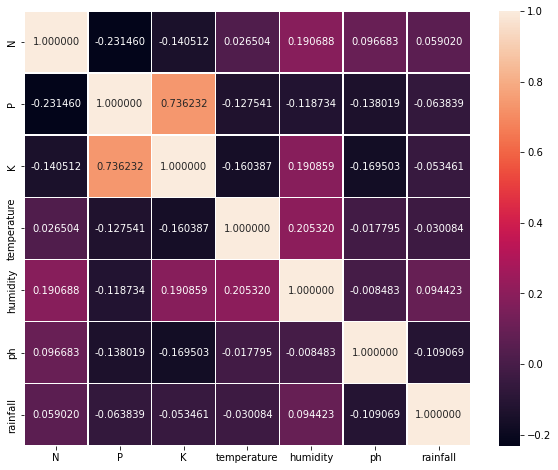

In [27]:
correlation_mat = df.corr()
correlation_mat
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, linewidths=.5,annot=True, fmt="f")

In [28]:
X = df.iloc[:,:-1]     # selecting all features except 'label' feature 
y = df.iloc[:,-1]      # selecting 'label' feature as dependent feature

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =2)

In [30]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


In [31]:
KNN_model = KNeighborsClassifier()

In [32]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
y_pred = KNN_model.predict(X_test)

In [34]:
results = classification_report(y_test, y_pred)
print(results)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

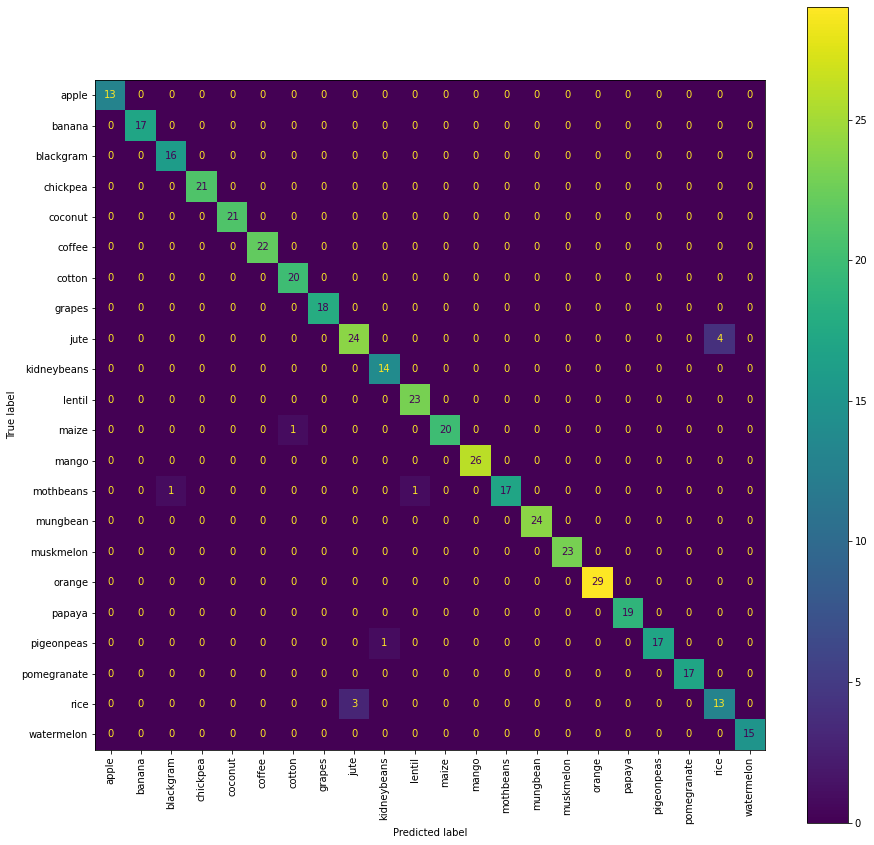

In [35]:
conf_mat = confusion_matrix(y_test, y_pred, labels=KNN_model.classes_)
figure, axes = plt.subplots(1, figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=KNN_model.classes_)
disp.plot(ax = axes, xticks_rotation='vertical') 

In [36]:
rice_df = df[df["label"] == 'rice']
jute_df = df[df["label"] == 'jute']
df_rice_jute = pd.concat([rice_df, jute_df])

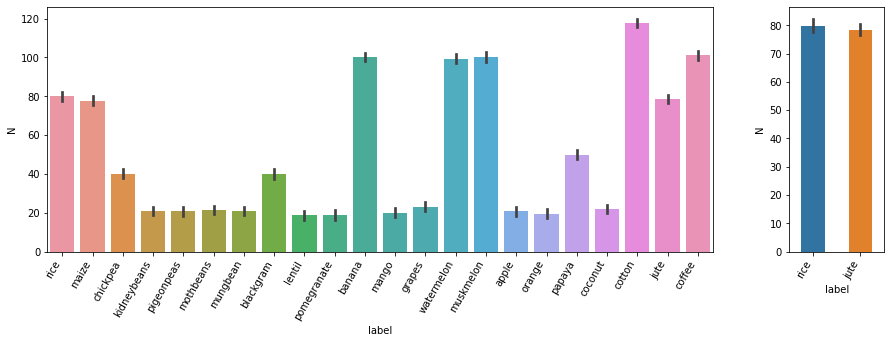

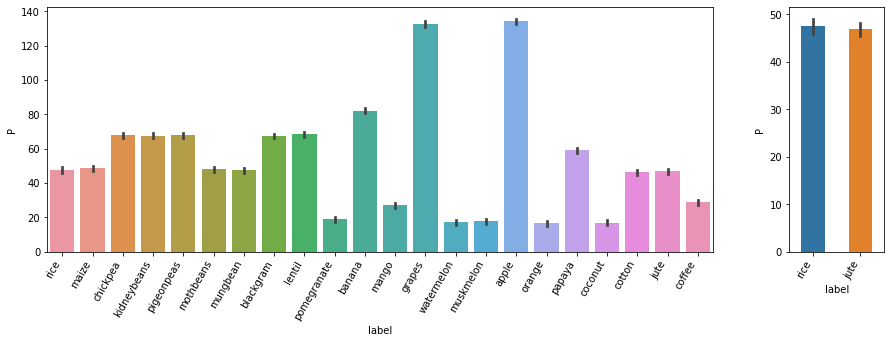

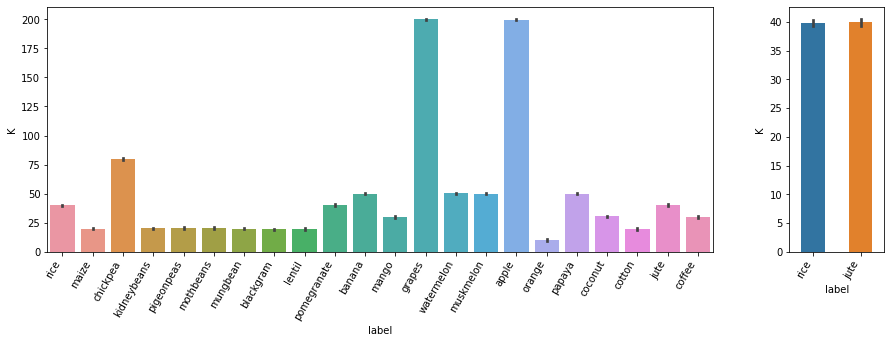

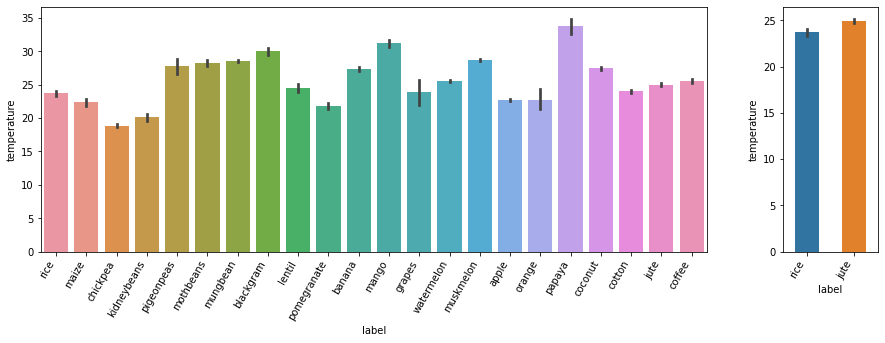

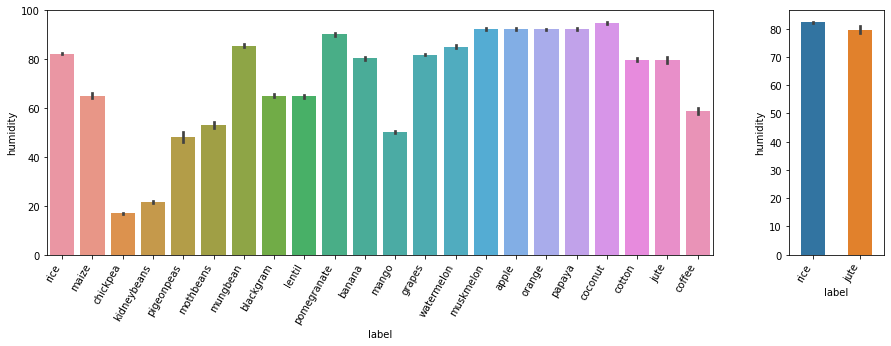

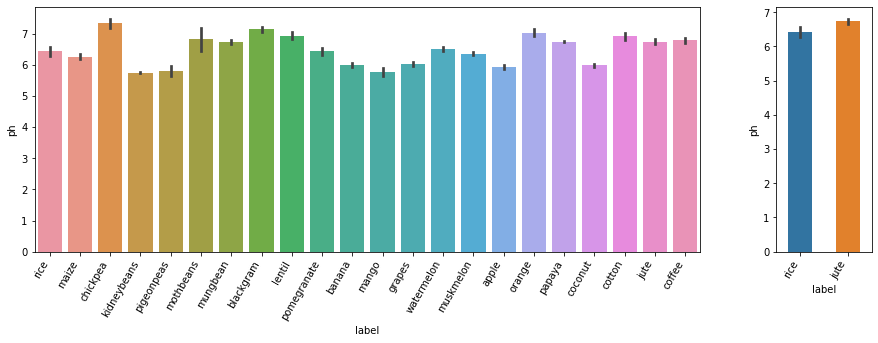

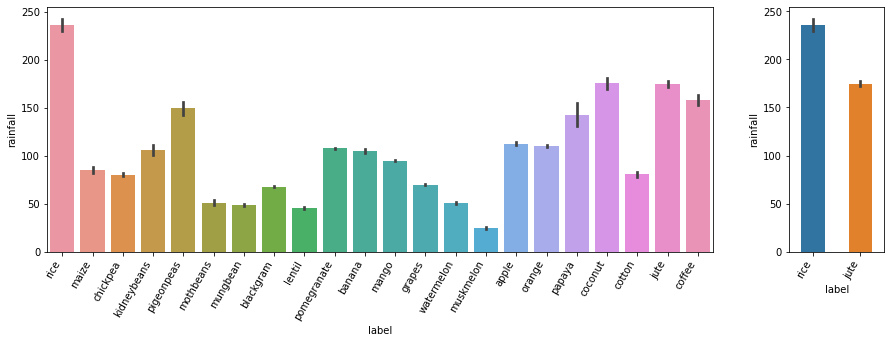

In [37]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

for col in df.columns[:-1]:
    fig, ax = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios': [3.5, 0.5]})
    sns.barplot(x = df['label'], y = df[col], data=df, ax = ax[0])
    sns.barplot(x = df_rice_jute['label'], y = df_rice_jute[col], data=df_rice_jute, ax = ax[1])
    change_width(ax[1], 0.5)
    fig.autofmt_xdate(rotation=60)
    plt.show()

In [38]:
file = open('KNN_model_crop_prediction.pkl', 'wb')
# dump information to that file
pickle.dump(KNN_model, file)